In [1]:
%pylab inline
from scipy.linalg import eig
from scipy.spatial.distance import squareform, pdist
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<function matplotlib.pyplot.show(close=None, block=None)>

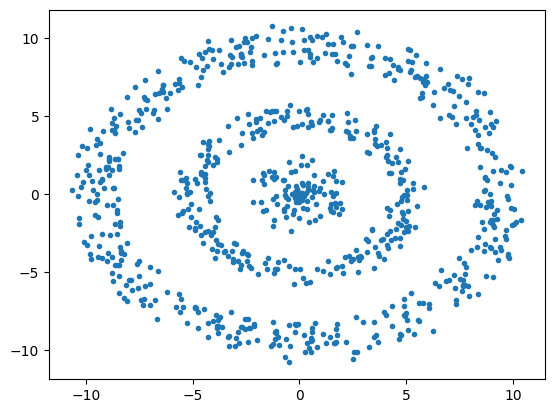

In [2]:
# Read datas

unarr_datas = []
with open('datas/circle3.txt', 'r') as in_file:
    raw_datas = in_file.readlines()
    for line in raw_datas:
        points = list(map(float, line.split()))
        unarr_datas.append(np.array([points[1], points[2]]))

datas = np.array(unarr_datas)
N = len(datas)

plt.scatter(datas[:, 0], datas[:, 1], marker='.')
plt.show

In [3]:
# Compute K, P, D matrices

def get_K0(data):
    Dis=squareform(pdist(data))
    Dis_sort = sort(Dis,1)    # distance of one point to another arrange in descending power
    Dis=Dis*Dis
    
    Sigma=diag(1/Dis_sort[:,s+1])
    
    K=Sigma.dot(Dis).dot(Sigma)
    K=exp(-K)
    return K
    
def get_K(data, sigma):
    Dis = squareform(pdist(data))
    Dis = Dis * Dis

    Sigma = np.eye(N) / (sigma**2)

    K = Sigma.dot(Dis)
    K = exp(-K)
    return K

def get_P(K, t):
    D = diag(1 / sum(K, axis=1))
    P = D.dot(K)
    return np.linalg.matrix_power(P, t)

def get_DnQ(K):
    D=diag(1/sqrt(sum(K, axis=1)))
    Q=D.dot(K).dot(D)
    return D, Q

def get_D(P):
    Dis = squareform(pdist(P))
    return Dis * Dis

In [4]:
# K = get_K(datas, 2)
s = 10
K = get_K0(datas)
D, Q= get_DnQ(K)
P = get_P(K, 1)

qval, qvec = eig(Q)
U, S, V = D.dot(qvec), diag(qval), transpose(qvec).dot(diag(sqrt(sum(K, axis=1))))
M = real(U.dot(S))

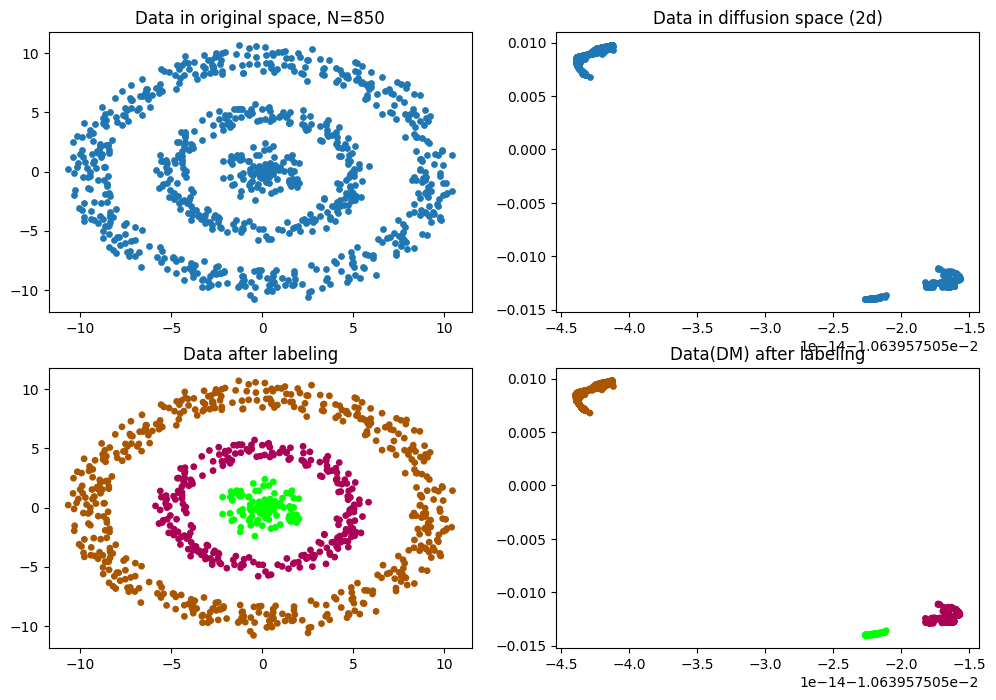

In [8]:
x, y = M[:,0], M[:,1]
X = np.array(list(zip(x, y)))
SIZE, cluster = 15, 3

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs[0,0].scatter(datas[:,0], datas[:,1], s=SIZE)
axs[0,0].set_title(f'Data in original space, N={N}')

axs[0,1].scatter(M[:,0], M[:,1], s=SIZE)
axs[0,1].set_title('Data in diffusion space (2d)') 

kmeans = KMeans(cluster)
kmeans = kmeans.fit(X)
labels = np.array(kmeans.predict(X)).reshape(N, 1)

cmap= cm.brg
norm = plt.Normalize(0, cluster)
colors = cmap(norm(labels+1))

axs[1,0].scatter(datas[:,0], datas[:,1], s=SIZE, color=colors)
axs[1,0].set_title('Data after labeling')

axs[1,1].scatter(M[:,0], M[:,1], s=SIZE, color=colors)
axs[1,1].set_title('Data(DM) after labeling')
plt.gcf().set_size_inches(12,8)
plt.savefig('circle3.png')
plt.show()

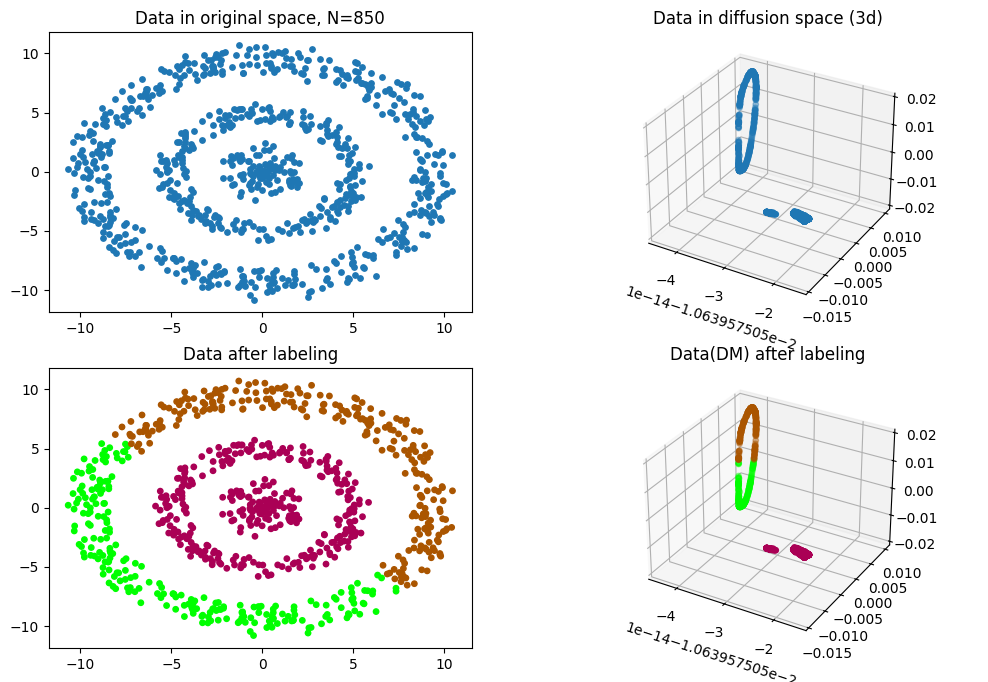

In [6]:
x, y, z = M[:,0], M[:,1], M[:,2]
X = np.array(list(zip(x, y, z)))
SIZE, cluster = 15, 3

cmap = plt.get_cmap('viridis')
norm = plt.Normalize(0, N)
colors = cmap(norm([i for i in range(N)]))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axs[0,0].scatter(datas[:,0], datas[:,1], s=SIZE)
axs[0,0].set_title(f'Data in original space, N={N}')

axs[0,1].set_axis_off()
axs[0,1] = fig.add_subplot(222, projection='3d')
axs[0,1].scatter(M[:,0], M[:,1], M[:,2], s=SIZE)
axs[0,1].set_title('Data in diffusion space (3d)')

kmeans = KMeans(cluster)
kmeans = kmeans.fit(X)
labels = np.array(kmeans.predict(X)).reshape(N, 1)

cmap= cm.brg
norm = plt.Normalize(0, cluster)
colors = cmap(norm(labels+1))

axs[1,0].scatter(datas[:,0], datas[:,1], s=SIZE, color=colors)
axs[1,0].set_title('Data after labeling')

axs[1,1].set_axis_off()
axs[1,1] = fig.add_subplot(224, projection='3d')
axs[1,1].scatter(M[:,0], M[:,1], M[:,2], s=SIZE, color=colors)
axs[1,1].set_title('Data(DM) after labeling')
plt.gcf().set_size_inches(12,8)
plt.show()